1. PRE-PROCESSING

1.1 DATA LOADING

In [1]:
# Read CSV file
import pandas as pd
df = pd.read_csv("C:/Users/FR/Downloads/google_ads.csv")

# Display the content of the DataFrame
df

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,"$1,892",11/16/2024,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,"$1,679",20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,"$1,624",11/16/2024,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,"$1,225",11/26/2024,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.90,30.0,8.0,NaN,"$1,091",11/22/2024,hyderabad,desktop,online data analytic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,A3595,DataAnalyticsCourse,88.0,5344.0,$242.07,17.0,9.0,0.054,"$1,418",29-11-2024,HYDERABAD,MOBILE,online data analytic
2596,A3596,DataAnalyticsCourse,154.0,3211.0,$248.28,14.0,6.0,0.039,"$1,950",11/28/2024,hyderabad,TABLET,data analitics online
2597,A3597,Data Anlytics Corse,113.0,3808.0,$233.25,18.0,4.0,0.035,"$1,085",11/2/2024,Hyderbad,desktop,data anaytics training
2598,A3598,Data Analytics Corse,196.0,5853.0,$220.13,16.0,7.0,0.036,"$1,558",11/8/2024,hydrebad,Tablet,data anaytics training


In [2]:
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ad_ID            2600 non-null   object 
 1   Campaign_Name    2600 non-null   object 
 2   Clicks           2489 non-null   float64
 3   Impressions      2546 non-null   float64
 4   Cost             2504 non-null   object 
 5   Leads            2552 non-null   float64
 6   Conversions      2526 non-null   float64
 7   Conversion Rate  1975 non-null   float64
 8   Sale_Amount      2461 non-null   object 
 9   Ad_Date          2600 non-null   object 
 10  Location         2600 non-null   object 
 11  Device           2600 non-null   object 
 12  Keyword          2600 non-null   object 
dtypes: float64(5), object(8)
memory usage: 264.2+ KB


1.2 DATA CLEANING

In [3]:
# Convert string values to numerical --> Cost, Sales_Amount
df["Cost"] = pd.to_numeric(df["Cost"].replace("[$,]", "", regex=True), errors='coerce')
df["Sale_Amount"] = pd.to_numeric(df["Sale_Amount"].replace("[$,]", "", regex=True), errors='coerce')

In [4]:
# Check for typo in string columns
string_columns = ['Campaign_Name', 'Location', 'Device', 'Keyword']

val_counts_all = []
for col in string_columns:
    counts = df[col].value_counts()
    val_counts_all.append((col, counts))

for col_name, counts in val_counts_all:
    print(f"\nValue counts for column: {col_name}")
    print(counts)


Value counts for column: Campaign_Name
Campaign_Name
Data Analytcis Course    680
Data Analytics Corse     647
DataAnalyticsCourse      637
Data Anlytics Corse      636
Name: count, dtype: int64

Value counts for column: Location
Location
HYDERABAD    660
Hyderbad     656
hyderabad    650
hydrebad     634
Name: count, dtype: int64

Value counts for column: Device
Device
MOBILE     311
tablet     305
Desktop    305
desktop    304
Mobile     291
TABLET     279
DESKTOP    278
mobile     276
Tablet     251
Name: count, dtype: int64

Value counts for column: Keyword
Keyword
online data analytic      453
learn data analytics      444
data analytics course     440
analytics for data        428
data analitics online     420
data anaytics training    415
Name: count, dtype: int64


In [5]:
# Fixing typos
## Campaign_Name
df["Campaign_Name"] = "Data Analytics Course"

## Location
df['Location'] = "Hyderabad" 

## Keyword
keyword_map = {
    'online data analytic': 'online data analytics',
    'data analitics online': 'data analytics online',
    'data anaytics training': 'data analytics training',
}
df['Keyword'] = df['Keyword'].replace(keyword_map, regex=True)


# Capitalize values
df["Device"] = df["Device"].str.capitalize()
df["Keyword"] = df["Keyword"].str.capitalize()

In [6]:
# Standardize date format
from datetime import datetime

## Function to standardize date format
def standardize_ad_date(date_str):
    # Convert DD-MM-YYYY to MM/DD/YYYY
    if '-' in date_str:
        try:
            dt = datetime.strptime(date_str, '%d-%m-%Y')
            return dt.strftime('%m/%d/%Y')
        except ValueError:
            return date_str
    return date_str

## Apply function to data frame
df['Ad_Date'] = df['Ad_Date'].apply(standardize_ad_date)

In [7]:
# Display the updated data frame
df

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,Data Analytics Course,104.0,4498.0,231.88,14.0,7.0,0.058,1892.0,11/16/2024,Hyderabad,Desktop,Learn data analytics
1,A1001,Data Analytics Course,173.0,5107.0,216.84,10.0,8.0,0.046,1679.0,11/20/2024,Hyderabad,Mobile,Data analytics course
2,A1002,Data Analytics Course,90.0,4544.0,203.66,26.0,9.0,NaN,1624.0,11/16/2024,Hyderabad,Desktop,Data analytics online
3,A1003,Data Analytics Course,142.0,3185.0,237.66,17.0,6.0,NaN,1225.0,11/26/2024,Hyderabad,Tablet,Data analytics training
4,A1004,Data Analytics Course,156.0,3361.0,195.90,30.0,8.0,NaN,1091.0,11/22/2024,Hyderabad,Desktop,Online data analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,A3595,Data Analytics Course,88.0,5344.0,242.07,17.0,9.0,0.054,1418.0,11/29/2024,Hyderabad,Mobile,Online data analytics
2596,A3596,Data Analytics Course,154.0,3211.0,248.28,14.0,6.0,0.039,1950.0,11/28/2024,Hyderabad,Tablet,Data analytics online
2597,A3597,Data Analytics Course,113.0,3808.0,233.25,18.0,4.0,0.035,1085.0,11/2/2024,Hyderabad,Desktop,Data analytics training
2598,A3598,Data Analytics Course,196.0,5853.0,220.13,16.0,7.0,0.036,1558.0,11/8/2024,Hyderabad,Tablet,Data analytics training


1.3 HANDLING MISSING VALUES

In [8]:
# Checking for missing values
df.isnull().sum()

Ad_ID                0
Campaign_Name        0
Clicks             111
Impressions         54
Cost                96
Leads               48
Conversions         74
Conversion Rate    625
Sale_Amount        139
Ad_Date              0
Location             0
Device               0
Keyword              0
dtype: int64

In [9]:
# Statistical summary
df.describe()


,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount
count,2489.000000,2546.000000,2504.000000,2552.000000,2526.000000,1975.000000,2461.000000
mean,138.979912,4523.437942,215.092636,20.005486,6.519794,0.048973,1498.804145
std,34.631298,870.131982,20.285794,6.030756,2.272392,0.019984,287.034407
min,80.000000,3000.000000,180.010000,10.000000,3.000000,0.015000,1000.000000
25%,110.000000,3764.000000,197.540000,15.000000,5.000000,0.035000,1248.000000
50%,139.000000,4518.500000,215.580000,20.000000,7.000000,0.046000,1505.000000
75%,169.000000,5279.500000,232.980000,25.000000,9.000000,0.058000,1742.000000
max,199.000000,5999.000000,249.890000,30.000000,10.000000,0.123000,2000.000000


In [10]:
# Filling in the missing values
normal_dist_cols = ['Clicks', 'Cost', 'Leads', 'Conversion_Rate']
skewed_cols = ['Impressions', 'Conversions', 'Sale_Amount']

for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    elif column in normal_dist_cols:
        df[column].fillna(df[column].mean(), inplace=True)
    elif column in skewed_cols:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

C:\Users\FR\AppData\Local\Temp\ipykernel_1760\1507886409.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\FR\AppData\Local\Temp\ipykernel_1760\1507886409.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [11]:
# Checking for missing values after elimination
df.isnull().sum()

Ad_ID              0
Campaign_Name      0
Clicks             0
Impressions        0
Cost               0
Leads              0
Conversions        0
Conversion Rate    0
Sale_Amount        0
Ad_Date            0
Location           0
Device             0
Keyword            0
dtype: int64

1.4 HANDLING DUPLICATE DATA

In [12]:
# Check for duplicate Ad ID
check_duplicate = df["Ad_ID"].duplicated().sum()
print(check_duplicate)

1


In [13]:
# Eliminate duplicate data
df = df.drop_duplicates()

# Recheck for duplicate Ad ID after elimination
recheck_duplicate = df["Ad_ID"].duplicated().sum()
print(recheck_duplicate)

0


2. INSIGHTS

2.1 Cost & Sales On Different Days of The Week 

C:\Users\FR\AppData\Local\Temp\ipykernel_1760\846433284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ad_Date'] = pd.to_datetime(df['Ad_Date'], errors='coerce')
C:\Users\FR\AppData\Local\Temp\ipykernel_1760\846433284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['Ad_Date'].dt.day_name()


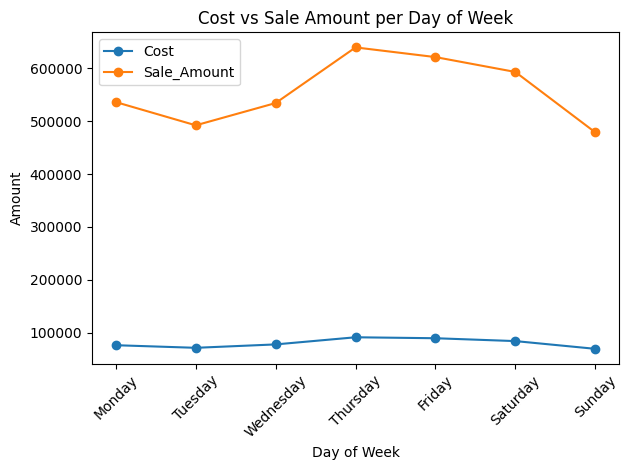

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by day of week
df['Ad_Date'] = pd.to_datetime(df['Ad_Date'], errors='coerce')
df['DayOfWeek'] = df['Ad_Date'].dt.day_name()
df_grouped_day = df.groupby('DayOfWeek')[['Cost', 'Sale_Amount']].sum().reset_index()

# Sort days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_grouped_day['DayOfWeek'] = pd.Categorical(df_grouped_day['DayOfWeek'], categories=days_order, ordered=True)
df_grouped_day = df_grouped_day.sort_values('DayOfWeek')

# Plot Line Chart
df_grouped_day.plot(kind="line", x="DayOfWeek", y=["Cost", "Sale_Amount"], marker='o')
plt.title("Cost vs Sale Amount per Day of Week")
plt.ylabel("Amount")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2.2 Cost vs Clicks Distribution by Device

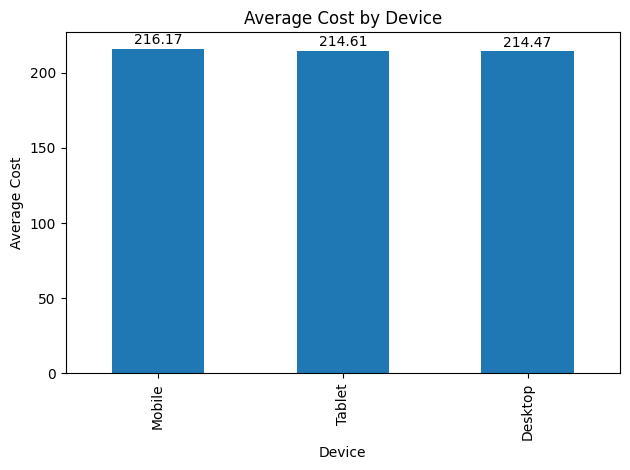

In [ ]:
# Group by Device and calculate average Cost
df_grouped_device = df.groupby("Device")["Cost"].mean().reset_index()
df_sorted_device = df_grouped_device.sort_values(by="Cost", ascending=False)

# Plot bar chart with value annotations
ax = df_sorted_device.plot(kind="bar", x="Device", y="Cost", legend=False)
plt.title("Average Cost by Device")
plt.ylabel("Average Cost")
plt.xlabel("Device")
plt.tight_layout()

# Annotate each bar with its value
for i, v in enumerate(df_sorted_device["Cost"]):
    ax.text(i, v + 1, f"{v:.2f}", ha='center', va='bottom')

plt.show()

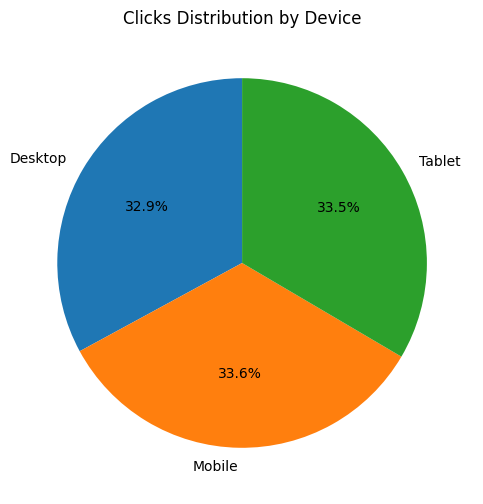

In [16]:
# Group by Device and sum Clicks
df_grouped_device = df.groupby("Device")["Clicks"].mean().reset_index()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(df_grouped_device["Clicks"], labels=df_grouped_device["Device"], autopct='%1.1f%%', startangle=90)
plt.title("Clicks Distribution by Device")
plt.show()

2.3 Cost vs Impressions Per Keyword

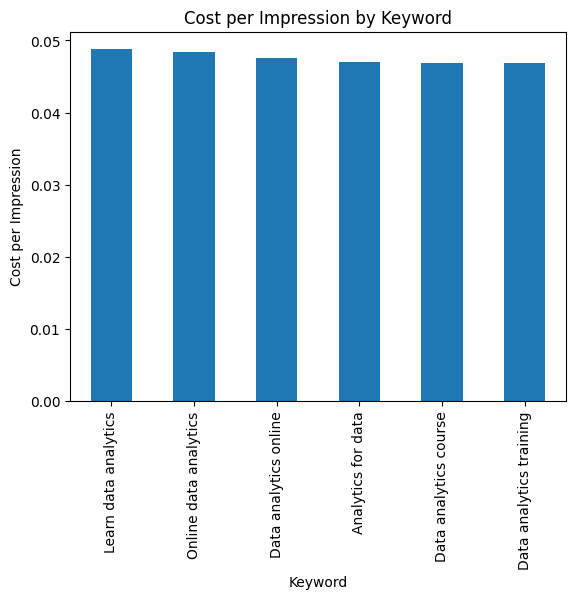

In [17]:
# Calculate cost per impression per keyword
df_keyword_cpi = df.groupby('Keyword')[['Cost', 'Impressions']].mean().reset_index()
df_keyword_cpi['Cost_per_Impression'] = df_keyword_cpi['Cost'] / df_keyword_cpi['Impressions']

# Sort by cost per impression descending
df_keyword_cpi = df_keyword_cpi.sort_values(by='Cost_per_Impression', ascending=False)

# Plot
ax = df_keyword_cpi.plot(kind="bar", x="Keyword", y="Cost_per_Impression", legend=False)
plt.title("Cost per Impression by Keyword")
plt.ylabel("Cost per Impression")
plt.xlabel("Keyword")
plt.show()

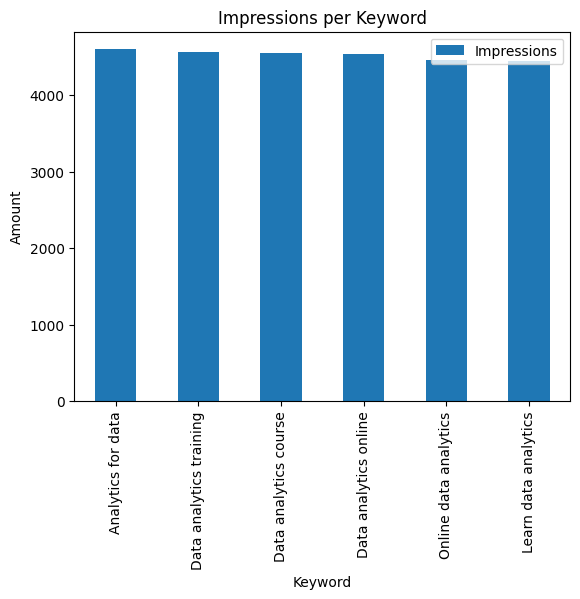

In [18]:
# Group by day of week
df_grouped_keyword = df.groupby('Keyword')[['Impressions']].mean().reset_index()
df_sorted_keyword = df_grouped_keyword.sort_values(by='Impressions', ascending=False)

# Plot Line Chart
df_sorted_keyword.plot(kind="bar", x="Keyword", y=["Impressions"])
plt.title("Impressions per Keyword")
plt.ylabel("Amount")
plt.xlabel("Keyword")
plt.show()